 # Reinforcement Learning - Assignment 2
 ## Arpit Parihar
 ## 05/04/2021
 ****

 A child has available a certain number of ice cream scoops every day, $s$. The child can store a number of scoops for the next day $a$ and eat the remainder scoops $c = s − a$. Mathematically,
 $$s = a + c$$
 where $a \in \{0, 1, .., s\}$. The number of scoops available the next day, $s'$, is equal to the number of scoops stored over night, $a$, plus an additional scoops provided by the parents, $e$. The number of scoops available the next day is given by:

 $$
 \begin{eqnarray}
 s'= && a + e' \\
   = && (s - c) + e'
 \end{eqnarray}
 $$

 where $e' \in \{0, 1, 2\}$. $e'$ is known after action $a$ is taken. The child can store up to $2$ scoops in the fridge every day which implies that $a \in \{0, 1, 2\}$ and $s \in \{0, 1, 2, 3, 4\}$. The transition probability matrix from $e$ to $e'$ is given by:

 $$P = \begin{bmatrix} 0.8 & 0.1 & 0.1 \\ 0.01 & 0.98 & 0.01 \\ 0.1 & 0.1 & 0.8 \end{bmatrix}$$

 Importing modules

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import joblib
import math
import gym
from gym import spaces
import random
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

 - **Construct the transition probability from $(s,e)$ to $(s′,e′)$ for each action $a \in \{0,1,2\}$.**

In [2]:
s = range(5)
e = range(3)
a = range(3)

p_e = np.array([
    [0.8, 0.1, 0.1],
    [0.01, 0.98, 0.01],
    [0.1, 0.1, 0.8]],
    dtype=float
)

P = np.zeros((len(a), len(s) * len(e), len(s) * len(e)), dtype=np.float64)
R = np.zeros((len(a), len(s) * len(e), len(s) * len(e)), dtype=np.float64)

for i in a:
    for j in range(len(s) * len(e)):
        P[i, j, i + np.arange(len(e)) * (len(s) + 1)] = p_e[j // len(s)]
        R[i, j, :] = math.log(
            j % len(s) - i + 1) if j % len(s) - i >= 0 else -math.inf

states = [f'({y}, {x})' for x in e for y in s]
P_mat = [pd.DataFrame(P[x, :, :], columns=states, index=states) for x in a]
for x in range(len(P_mat)):
    print(f'Transition matrix for a = {x}:\n')
    P_mat[x]
    print('\n')

Transition matrix for a = 0:



,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 1)","(0, 2)","(1, 2)","(2, 2)","(3, 2)","(4, 2)"
"(0, 0)",0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0
"(1, 0)",0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0
"(2, 0)",0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0
"(3, 0)",0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0
"(4, 0)",0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0
"(0, 1)",0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0
"(1, 1)",0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0
"(2, 1)",0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0
"(3, 1)",0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0
"(4, 1)",0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0




Transition matrix for a = 1:



,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 1)","(0, 2)","(1, 2)","(2, 2)","(3, 2)","(4, 2)"
"(0, 0)",0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0
"(1, 0)",0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0
"(2, 0)",0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0
"(3, 0)",0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0
"(4, 0)",0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10,0.0
"(0, 1)",0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0
"(1, 1)",0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0
"(2, 1)",0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0
"(3, 1)",0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0
"(4, 1)",0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01,0.0




Transition matrix for a = 2:



,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 1)","(0, 2)","(1, 2)","(2, 2)","(3, 2)","(4, 2)"
"(0, 0)",0.0,0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10
"(1, 0)",0.0,0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10
"(2, 0)",0.0,0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10
"(3, 0)",0.0,0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10
"(4, 0)",0.0,0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.10
"(0, 1)",0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01
"(1, 1)",0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01
"(2, 1)",0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01
"(3, 1)",0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01
"(4, 1)",0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.0,0.0,0.01


 - **The child subjected utility from eating ice cream is $log(c+1)$ if $c≥0$ and $−\infty$ otherwise. Construct the reward matrix for each transition $(s,e,a)$ and $(s′,e′)$.**

In [3]:
R_mat = [pd.DataFrame(R[x, :, :], columns=states, index=states) for x in a]
for x in range(len(R_mat)):
    print(f'Reward matrix for a = {x}:\n')
    R_mat[x]
    print('\n')

Reward matrix for a = 0:



,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 1)","(0, 2)","(1, 2)","(2, 2)","(3, 2)","(4, 2)"
"(0, 0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 0)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(3, 0)",1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294
"(4, 0)",1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438
"(0, 1)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 1)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(3, 1)",1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294
"(4, 1)",1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438




Reward matrix for a = 1:



,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 1)","(0, 2)","(1, 2)","(2, 2)","(3, 2)","(4, 2)"
"(0, 0)",-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
"(1, 0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(2, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(3, 0)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(4, 0)",1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294
"(0, 1)",-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
"(1, 1)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(2, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(3, 1)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(4, 1)",1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294




Reward matrix for a = 2:



,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 1)","(0, 2)","(1, 2)","(2, 2)","(3, 2)","(4, 2)"
"(0, 0)",-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
"(1, 0)",-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
"(2, 0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(3, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(4, 0)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(0, 1)",-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
"(1, 1)",-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
"(2, 1)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(3, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(4, 1)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612


 - **Apply the value iteration approach to compute the value function for each state $(s,e)$ and optimal policy. Iterate $600$ times.**

In [4]:
# Creating q vector
q = np.zeros((len(a), len(s) * len(e)), dtype=np.float64)

for i in a:
    for j in range(len(s) * len(e)):
        q[i, j] = np.nan_to_num(np.dot(P[i, j, :], R[i, j, :]), nan=-math.inf)

T = 600
beta = 0.98
v = np.zeros((len(states), T + 1),dtype=np.float64)
d = np.zeros((len(states), T + 1),dtype=np.float64)

for t in range(1, T + 1):
    for i in range(len(states)):
        rhs = np.zeros(len(a), dtype=np.float64)
        for j in a:
            rhs[j] = q[j, i] + beta*np.matmul(P[j, i, :], v[:, t - 1])
        v[i, t] = max(rhs)
        d[i, t] = np.argmax(rhs)

v = pd.DataFrame(v.T, columns=states)
d = pd.DataFrame(d.T, columns=states)

 - **For each $e$, plot the value function $v(s,e)$ with $s$ on the x-axis. (hint: there should be 3 lines plots, one for each $e\in\{0,1,2\}$).**

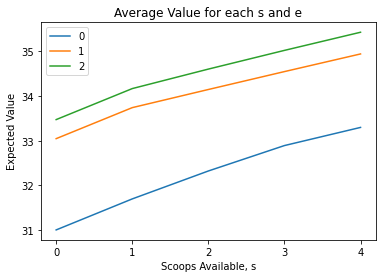

In [5]:
plot_data = np.zeros((len(s), len(e)))
for i in range(len(states)):
    row = eval(v.iloc[-1].index[i])[0]
    column = eval(v.iloc[-1].index[i])[1]
    plot_data[row, column] = v.iloc[-1, i]

plt.plot(plot_data)
plt.xlabel('Scoops Available, s')
plt.xticks(ticks=s)
plt.ylabel('Expected Value')
plt.legend(e)
plt.title('Average Value for each s and e')
plt.show();

 **For each $e$, plot the optimal policy for storing ice cream scoops $a(s,e)$ with $s$ on the x-axis. (hint: there should be 3 lines plots, one for each $e\in\{0,1,2\}$).**

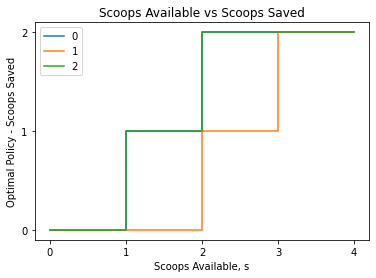

In [6]:
plot_data = np.zeros((len(s), len(e)))
for i in range(len(states)):
    row = eval(d.iloc[-1].index[i])[0]
    column = eval(d.iloc[-1].index[i])[1]
    plot_data[row, column] = d.iloc[-1, i]

plt.plot(plot_data, drawstyle='steps')
plt.xlabel('Scoops Available, s')
plt.xticks(ticks=s)
plt.ylabel('Optimal Policy - Scoops Saved')
plt.yticks(a)
plt.legend(e)
plt.title('Scoops Available vs Scoops Saved')
plt.show();

 - **For each $e$, plot the optimal policy for consuming ice cream scoops $c(s,e)$ with $s$ on the x-axis. (hint: there should be 3 lines plots, one for each $e\in\{0,1,2\}$).**

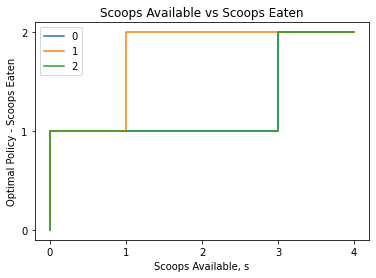

In [7]:
plot_data = np.zeros((len(s), len(e)))
for i in range(len(states)):
    row = eval(d.iloc[-1].index[i])[0]
    column = eval(d.iloc[-1].index[i])[1]
    plot_data[row, column] = row - d.iloc[-1, i]

plt.plot(plot_data, drawstyle='steps')
plt.xlabel('Scoops Available, s')
plt.xticks(ticks=s)
plt.ylabel('Optimal Policy - Scoops Eaten')
plt.yticks(a)
plt.legend(e)
plt.title('Scoops Available vs Scoops Eaten')
plt.show();

In [8]:
P_optim = np.array([P[j, i, :] for (i, j) in enumerate(d.iloc[-1].astype('int'))])
R_optim = np.array([R[j, i, :] for (i, j) in enumerate(d.iloc[-1].astype('int'))])

 - **Simulate a sequence of $e$ and set an initial value for $s$. Given the optimal policy, calculate and plot the evolution of $a, c,$ and $s$ over time.**

In [9]:
p_e_dat = pd.DataFrame(p_e)
T = 600
plot_data = pd.DataFrame(np.zeros((T, 5), dtype=np.float64),
                        columns = ['State', 'a', 'c', 'State_new', 's'])
state = random.choice(states)
for i in range(T):
    s_sim = eval(state)[0]
    e_sim = eval(state)[1]
    a_sim = d.iloc[-1][state]
    
    c_sim = s_sim - a_sim
    r_sim = np.log(c_sim + 1)
    
    rand_num = np.random.uniform(low=0.0, high=1.0)
    e_new = pd.Series(e)[p_e_dat.iloc[e_sim, :].cumsum().ge(rand_num)].iloc[0]
    s_new = a_sim + e_new
    state_new = f'({int(s_new)}, {int(e_new)})'
    
    plot_data.iloc[i, :] = [state, a_sim, c_sim, state_new, s_sim]
    state = state_new

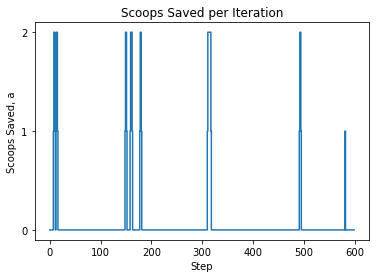

In [10]:
plt.plot(plot_data['a'], drawstyle='steps')
plt.yticks(a)
plt.xlabel('Step')
plt.ylabel('Scoops Saved, a')
plt.title('Scoops Saved per Iteration')
plt.show();

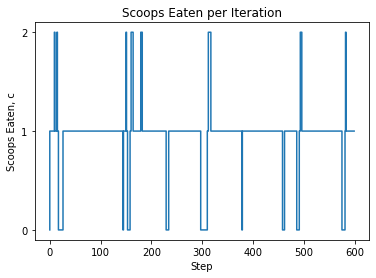

In [11]:
plt.plot(plot_data['c'], drawstyle='steps')
plt.yticks(a)
plt.xlabel('Step')
plt.ylabel('Scoops Eaten, c')
plt.title('Scoops Eaten per Iteration')
plt.show();

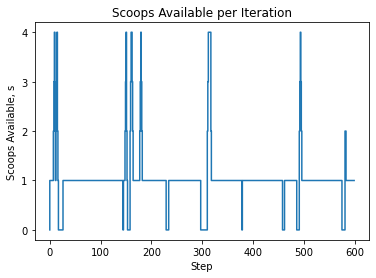

In [12]:
plt.plot(plot_data['s'], drawstyle='steps')
plt.yticks(s)
plt.xlabel('Step')
plt.ylabel('Scoops Available, s')
plt.title('Scoops Available per Iteration')
plt.show();

 - **Construct the transition probability and reward matrices between $(s,e)$ and $(s′,e′)$ that produces the highest expected discount rewards. (hint: you need to use the optimal policy)**

In [13]:
P_optim = pd.DataFrame(
    np.array([P[j, i, :] for (i, j) in enumerate(d.iloc[-1].astype('int'))]),
    columns=states,
    index=states)
R_optim = pd.DataFrame(
    np.array([R[j, i, :] for (i, j) in enumerate(d.iloc[-1].astype('int'))]),
    columns=states,
    index=states)
print('Optimal Transition Matrix:\n')
P_optim
print('Optimal Reward Matrix:\n')
R_optim

Optimal Transition Matrix:



,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 1)","(0, 2)","(1, 2)","(2, 2)","(3, 2)","(4, 2)"
"(0, 0)",0.80,0.00,0.00,0.0,0.0,0.0,0.10,0.00,0.00,0.0,0.0,0.0,0.10,0.00,0.00
"(1, 0)",0.80,0.00,0.00,0.0,0.0,0.0,0.10,0.00,0.00,0.0,0.0,0.0,0.10,0.00,0.00
"(2, 0)",0.00,0.80,0.00,0.0,0.0,0.0,0.00,0.10,0.00,0.0,0.0,0.0,0.00,0.10,0.00
"(3, 0)",0.00,0.00,0.80,0.0,0.0,0.0,0.00,0.00,0.10,0.0,0.0,0.0,0.00,0.00,0.10
"(4, 0)",0.00,0.00,0.80,0.0,0.0,0.0,0.00,0.00,0.10,0.0,0.0,0.0,0.00,0.00,0.10
"(0, 1)",0.01,0.00,0.00,0.0,0.0,0.0,0.98,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.00
"(1, 1)",0.01,0.00,0.00,0.0,0.0,0.0,0.98,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.00
"(2, 1)",0.01,0.00,0.00,0.0,0.0,0.0,0.98,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.00
"(3, 1)",0.00,0.01,0.00,0.0,0.0,0.0,0.00,0.98,0.00,0.0,0.0,0.0,0.00,0.01,0.00
"(4, 1)",0.00,0.00,0.01,0.0,0.0,0.0,0.00,0.00,0.98,0.0,0.0,0.0,0.00,0.00,0.01


Optimal Reward Matrix:



,"(0, 0)","(1, 0)","(2, 0)","(3, 0)","(4, 0)","(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 1)","(0, 2)","(1, 2)","(2, 2)","(3, 2)","(4, 2)"
"(0, 0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(3, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(4, 0)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(0, 1)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 1)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(3, 1)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(4, 1)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612


 - **Calculate the value function for the Markov process with rewards that produces the highest expected discount rewards. (hint: use the transition probability and reward matrices from the previous question). Does the value function matches reasonably the value function from the previous question? (hint: it should)**

In [14]:
q_sim = np.zeros(len(s) * len(e), dtype=np.float64)

for j in range(len(s) * len(e)):
    q_sim[j] = np.nan_to_num(np.dot(P_optim.iloc[j, :], R_optim.iloc[j, :]), nan=-math.inf)

T = 600
beta = 0.98
v_sim = np.zeros((len(states), T + 1),dtype=np.float64)
d_sim = np.zeros((len(states), T + 1),dtype=np.float64)

for t in range(1, T + 1):
    for i in range(len(states)):
        rhs = q_sim[i] + beta*np.matmul(P_optim.iloc[i, :], v_sim[:, t - 1])
        v_sim[i, t] = rhs

v_sim = pd.DataFrame(v_sim.T, columns=states)

 - **Simulate the Markov process with rewards from the previous question for starting at each state pair $(e,s)$. Compute the average discounted reward. Does it match reasonabily close to the value function in the previous question? (hint: it should)**

In [15]:
try:
    sim_data = joblib.load('sim_data.pkl')
except:
    T = 1000
    j = 0
    sim_data = pd.DataFrame(np.zeros((len(states)*T, 8), dtype=np.float64),
                            columns = ['State_sim_start', 'State_init', 's', 'e', 'a', 'c', 'State_new', 'Reward'])
    beta = 0.98
    for state in states:
        state_start = state
        state_sim = state
        for i in range(T):
            s_sim = eval(state_sim)[0]
            e_sim = eval(state_sim)[1]
            a_sim = d.iloc[-1][state_sim]
            c_sim = s_sim - a_sim

            rand_num = np.random.uniform(low=0.0, high=1.0)
            r_sim = beta**i * R_optim.loc[state_sim, P_optim.loc[state_sim, :].cumsum().ge(rand_num)][0]
            state_new = np.array(states)[P_optim.loc[state_sim, :].cumsum().ge(rand_num)][0]

            sim_data.iloc[j*T+i, :] = [state_start, state_sim, s_sim, e_sim, a_sim, c_sim, state_new, r_sim]

            state_sim = state_new
        j+=1
    joblib.dump(sim_data, 'sim_data.pkl')

v_sim_2 = sim_data[['State_sim_start', 'Reward']].groupby('State_sim_start').sum()

table_comp = pd.DataFrame(v.iloc[-1].T).merge(
    pd.DataFrame(v_sim.iloc[-1].T),
    left_index=True, 
    right_index=True).merge(
        v_sim_2, 
        left_index=True, 
        right_index=True)
table_comp.columns = ['Value Iteration', 'Value Optimal Policy', 'Simulated Average Reward']
table_comp


,Value Iteration,Value Optimal Policy,Simulated Average Reward
"(0, 0)",31.006796,31.006796,35.048230
"(1, 0)",31.699944,31.699943,31.295703
"(2, 0)",32.324098,32.324098,28.134149
"(3, 0)",32.892400,32.892400,34.958642
"(4, 0)",33.297866,33.297865,34.468836
"(0, 1)",33.046879,33.046879,33.901327
"(1, 1)",33.740026,33.740026,36.424923
"(2, 1)",34.145491,34.145491,36.242806
"(3, 1)",34.545792,34.545792,32.401474
"(4, 1)",34.940331,34.940331,35.397111


 - **Calculate the optimal policy based on the policy iteration approach.**

In [16]:
q = np.zeros((len(a), len(s) * len(e)), dtype=np.float64)
qq = np.zeros(len(s) * len(e), dtype=np.float64)

for i in a:
    for j in range(len(s) * len(e)):
        q[i, j] = np.nan_to_num(np.dot(P[i, j, :], R[i, j, :]), nan=-math.inf)

T = 600
beta = 0.98
v = np.zeros((len(states), T + 1),dtype=np.float64)
d = np.zeros((len(states), T + 1),dtype=np.float64)

for t in range(1, T + 1):
    for i in range(len(states)):
        rhs = np.zeros(len(a), dtype=np.float64)
        for j in a:
            rhs[j] = q[j, i] + beta*np.matmul(P[j, i, :], v[:, t - 1])
        v[i, t] = max(rhs)
        d[i, t] = np.argmax(rhs)

    PP = np.array([P[j, i, :] for (i, j) in enumerate(d[:, t].astype('int'))])
    A = np.concatenate((np.identity(len(states)) - PP, np.ones((len(states), 1))), axis=1)
    # A = np.identity(len(states)) - PP
    A = np.delete(A, len(states)-1, 1)
    
    qq = np.array([q[j, i] for (i, j) in enumerate(d[:, t].astype('int'))])
    tmp = np.matmul(np.linalg.inv(A), qq)
    g = tmp[len(states)-1]
    tmp[len(states)-1] = 0
    v[:, t] = tmp.T
    
v = pd.DataFrame(v.T, columns=states)
d = pd.DataFrame(d.T, columns=states)
d.iloc[-1]


(0, 0)    0.0
(1, 0)    0.0
(2, 0)    1.0
(3, 0)    2.0
(4, 0)    2.0
(0, 1)    0.0
(1, 1)    0.0
(2, 1)    0.0
(3, 1)    1.0
(4, 1)    2.0
(0, 2)    0.0
(1, 2)    0.0
(2, 2)    1.0
(3, 2)    2.0
(4, 2)    2.0
Name: 600, dtype: float64

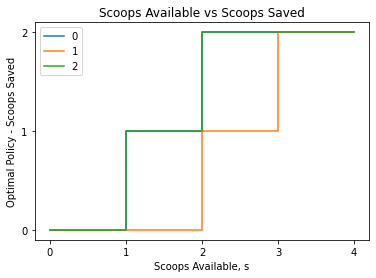

In [17]:
plot_data = np.zeros((len(s), len(e)))
for i in range(len(states)):
    row = eval(d.iloc[-1].index[i])[0]
    column = eval(d.iloc[-1].index[i])[1]
    plot_data[row, column] = d.iloc[-1, i]

plt.plot(plot_data, drawstyle='steps')
plt.xlabel('Scoops Available, s')
plt.xticks(ticks=s)
plt.ylabel('Optimal Policy - Scoops Saved')
plt.yticks(a)
plt.legend(e)
plt.title('Scoops Available vs Scoops Saved')
plt.show();